In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ast
from sklearn.manifold import TSNE
import umap
import sys
from random import randint
infile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/figs/PCA_tsne_umap/BL14_all_matrixCin_nr0.4_imputed_processed_intesectedwith_BL14_atleast.2_top-1_singleCpG_final_record.txt_organized.txt'
phenfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/figs/PCA_tsne_umap/BL14_PhenoClass.txt'
phenrequired=True
indf=pd.read_csv(infile,sep='\t')
whichdecomp="UMAP"#sys.argv[4] # PCA #tSNE #"UMAP"
samplestartindex=4 #1 #4

neddtotransposed=True

phendf=pd.read_csv(phenfile,sep="\t",header=None,index_col=0)
indf.head()

,Unnamed: 0,chrom,start,end,aS007DD51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,aS007G756.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,aS009W451.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,bC00256A1bs.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,bC003VO55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,bC0066P51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,...,rS00XTP51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Tregs.bw.bedgraph_rolled,sS001U352.CPG_methylation_calls.bs_call.GRCh38.20160531-P-EM-CD4pos_T-cell.bw.bedgraph_rolled,sS014QS55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-CM-CD4pos_T-cell.bw.bedgraph_rolled,uS004AV51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-megakaryocyte.bw.bedgraph_rolled,uS004BT51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-megakaryocyte.bw.bedgraph_rolled,wS002R551.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Erythroblast.bw.bedgraph_rolled,wS002S351.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Erythroblast.bw.bedgraph_rolled,xC003N351.CPG_methylation_calls.bs_call.GRCh38.20160531-P-memory_B_cell.bw.bedgraph_rolled,xcsMBC_NC11_41.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Class-switched_mem_B_cell.bw.bedgraph_rolled,xS017RE51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-memory_B_cell.bw.bedgraph_rolled
0,32617,chr16,50550238,50550240,0.114,0.082,0.138,0.403,0.156,0.742,...,0.866,0.789,0.720,0.946,0.906,0.907,0.866,0.970,0.973,0.971
1,32623,chr16,50550262,50550264,0.118,0.101,0.186,0.416,0.209,0.771,...,0.849,0.819,0.733,0.983,0.969,0.968,0.942,0.990,0.938,0.980
2,32629,chr16,50550274,50550276,0.072,0.028,0.065,0.241,0.128,0.667,...,0.696,0.484,0.500,0.933,0.908,0.956,0.969,0.971,0.850,0.961
3,32635,chr16,50550294,50550296,0.076,0.062,0.108,0.351,0.114,0.771,...,0.890,0.788,0.663,0.933,0.966,0.942,0.953,0.946,0.920,1.000
4,32641,chr16,50550303,50550305,0.016,0.058,0.108,0.338,0.043,0.714,...,0.740,0.655,0.582,0.935,0.909,0.963,0.906,0.978,0.932,0.966


In [2]:
phendf.head()

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,,,,,,,,,,,,,,,,,,,,,
CD4,1,1,1,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CD8,2,2,2,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
nB,2,2,2,2,2,2,1,1,1,2,...,2,2,2,2,2,2,2,2,2,2
NK,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
Mn,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [3]:
sampledf=indf[indf.columns[samplestartindex:]]
sampledf.head()

,aS007DD51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,aS007G756.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,aS009W451.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,bC00256A1bs.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,bC003VO55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,bC0066P51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,cC0068L51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive_B_cell.bw.bedgraph_rolled,cNBC_NC11_41.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive_B_cell.bw.bedgraph_rolled,cS01ECGA1.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive_B_cell.bw.bedgraph_rolled,dC002CTA1bs.CPG_methylation_calls.bs_call.GRCh38.20160531-P-NK_cell.bw.bedgraph_rolled,...,rS00XTP51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Tregs.bw.bedgraph_rolled,sS001U352.CPG_methylation_calls.bs_call.GRCh38.20160531-P-EM-CD4pos_T-cell.bw.bedgraph_rolled,sS014QS55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-CM-CD4pos_T-cell.bw.bedgraph_rolled,uS004AV51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-megakaryocyte.bw.bedgraph_rolled,uS004BT51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-megakaryocyte.bw.bedgraph_rolled,wS002R551.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Erythroblast.bw.bedgraph_rolled,wS002S351.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Erythroblast.bw.bedgraph_rolled,xC003N351.CPG_methylation_calls.bs_call.GRCh38.20160531-P-memory_B_cell.bw.bedgraph_rolled,xcsMBC_NC11_41.CPG_methylation_calls.bs_call.GRCh38.20160531-P-Class-switched_mem_B_cell.bw.bedgraph_rolled,xS017RE51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-memory_B_cell.bw.bedgraph_rolled
0,0.114,0.082,0.138,0.403,0.156,0.742,0.902,0.978,0.974,0.911,...,0.866,0.789,0.720,0.946,0.906,0.907,0.866,0.970,0.973,0.971
1,0.118,0.101,0.186,0.416,0.209,0.771,0.984,0.989,1.000,0.874,...,0.849,0.819,0.733,0.983,0.969,0.968,0.942,0.990,0.938,0.980
2,0.072,0.028,0.065,0.241,0.128,0.667,0.968,0.968,0.909,0.816,...,0.696,0.484,0.500,0.933,0.908,0.956,0.969,0.971,0.850,0.961
3,0.076,0.062,0.108,0.351,0.114,0.771,0.966,0.978,1.000,0.920,...,0.890,0.788,0.663,0.933,0.966,0.942,0.953,0.946,0.920,1.000
4,0.016,0.058,0.108,0.338,0.043,0.714,0.966,0.953,0.935,0.917,...,0.740,0.655,0.582,0.935,0.909,0.963,0.906,0.978,0.932,0.966


In [4]:

if phenrequired==True:
    target=[]
    for index, row in phendf.iterrows():
        target=target+[str(index)]*row.tolist().count(1)
else:
    target=(sampledf.columns).tolist()
print(target)

['CD4', 'CD4', 'CD4', 'CD8', 'CD8', 'CD8', 'nB', 'nB', 'nB', 'NK', 'NK', 'NK', 'Mn', 'Mn', 'Mn', 'mNeu', 'mNeu', 'mNeu', 'm8', 'm8', 'DC', 'DC', 'DC', 'Eo', 'Eo', 'Tr', 'Tr', 'm4', 'm4', 'Mg', 'Mg', 'Er', 'Er', 'mB', 'mB', 'mB']


In [5]:
'''
sns.set(font_scale=1.5)
plt.figure(figsize=(30,10))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")
aaa=sns.heatmap(sampledf, cmap=mycmap,vmin=0, vmax=1, yticklabels=False)
aaa.xaxis.tick_top() # x axis on top
'''

'\nsns.set(font_scale=1.5)\nplt.figure(figsize=(30,10))\nmycmap = plt.cm.viridis\nmycmap.set_bad("dimgrey")\naaa=sns.heatmap(sampledf, cmap=mycmap,vmin=0, vmax=1, yticklabels=False)\naaa.xaxis.tick_top() # x axis on top\n'

In [6]:

############################# PCA ############################
def pca_comp(stdData):
	pca = PCA()
	principalComponents = pca.fit_transform(stdData)
	return principalComponents



####################tsne###############
def tsne_comp(stdData):
	tsne = TSNE(random_state=100)
	principalComponents = tsne.fit_transform(stdData)
	return principalComponents


####################umap###############
def umap_comp(stdData):
	um = umap.UMAP(random_state=100)
	principalComponents = um.fit_transform(stdData)
	return principalComponents

In [7]:
if neddtotransposed==True:
    sampledf=sampledf.transpose()
sampledf.head()

,0,1,2,3,4,5,6,7,8,9,...,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631
aS007DD51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,0.114,0.118,0.072,0.076,0.016,0.033,0.0450,0.231,0.037,0.231,...,0.923,0.909,1.000,0.913,0.963,0.963,0.893,0.964,0.962,0.963
aS007G756.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,0.082,0.101,0.028,0.062,0.058,0.077,0.0420,0.091,0.095,0.353,...,0.912,1.000,0.969,1.000,1.000,0.972,0.943,1.000,1.000,1.000
aS009W451.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled,0.138,0.186,0.065,0.108,0.108,0.098,0.0435,0.038,0.042,0.136,...,0.889,0.923,0.926,1.000,0.949,0.927,0.976,1.000,1.000,1.000
bC00256A1bs.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,0.403,0.416,0.241,0.351,0.338,0.324,0.3180,0.286,0.350,0.625,...,0.970,0.906,0.961,0.980,1.000,0.959,1.000,1.000,0.951,0.974
bC003VO55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled,0.156,0.209,0.128,0.114,0.043,0.087,0.3000,0.455,0.200,0.700,...,0.962,1.000,0.939,0.943,0.939,1.000,0.933,1.000,0.962,1.000


In [8]:
if sampledf.shape[0]!=len(target):
    print("problem")
    sys.exit(1)

In [9]:
standardizedData= sampledf
#standardizedData= StandardScaler().fit_transform(sampledf)

In [10]:

################# call decomposition ###########
if whichdecomp=="PCA":
	projected=pca_comp(standardizedData)
elif whichdecomp=="tSNE":
    projected=tsne_comp(standardizedData)
elif whichdecomp=="UMAP":
    projected=umap_comp(standardizedData)
else:
    print ("wrong reduction")

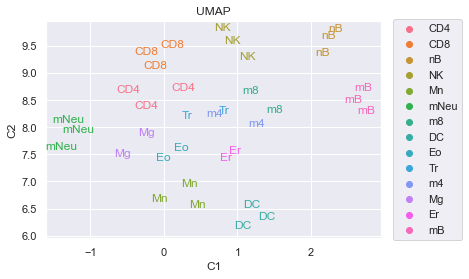

In [11]:
colors = sns.color_palette("husl", len(phendf.index))  ####for collupsed sample neeed tos et target

g=sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=target,edgecolor='none', s=0, palette=colors) #,style=target,markers=target)

g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

# For each point, we add a text inside the bubble
curr_cell = target[0]
i = 0
for line in range(0,len(target)):
    if curr_cell != target[line]:
        i += 1
        curr_cell = target[line]
    plt.text(projected[:, 0][line], projected[:, 1][line], target[line], horizontalalignment='center', color=colors[i])

plt.title(whichdecomp)

plt.xlabel('C1')
plt.ylabel('C2')

#g.set(xlim=(-25,0),ylim=(-20, 0))
#g.set(xlim=(-5,0),ylim=(-10, 0))
savename=infile+"_"+whichdecomp+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()